In [1]:
import pandas as pd
from sklearn.externals import joblib
import re
from nltk.stem.snowball import SnowballStemmer
from collections import defaultdict
import operator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_path = r'D:\ORGANIZATION\UCSD_Life\Work\4. Quarter-3\Subjects\MED 277\Project\DATA\\'
data_file = base_path+"NOTEEVENTS.csv.gz"

In [3]:
#df = pd.read_csv(data_file, compression='gzip', header=0, sep=' ', quotechar='"', error_bad_lines=False)
df = pd.read_csv(data_file, compression='gzip')

C:\Users\harsh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
## Taking small data for analysis
df1 = df[:10000]

In [ ]:
joblib.dump(df1,base_path+'data10.pkl')

In [3]:
df1 =  joblib.load(base_path+'data10.pkl')
df = df1[:50]

In [4]:
df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [5]:
df.dtypes

ROW_ID           int64
SUBJECT_ID       int64
HADM_ID        float64
CHARTDATE       object
CHARTTIME       object
STORETIME       object
CATEGORY        object
DESCRIPTION     object
CGID           float64
ISERROR        float64
TEXT            object
dtype: object

In [6]:
df.count()

ROW_ID         2083180
SUBJECT_ID     2083180
HADM_ID        1851344
CHARTDATE      2083180
CHARTTIME      1766614
STORETIME      1246404
CATEGORY       2083180
DESCRIPTION    2083180
CGID           1246404
ISERROR            886
TEXT           2083180
dtype: int64

In [7]:
df['CATEGORY'].unique()

array(['Discharge summary', 'Echo', 'ECG', 'Nursing', 'Physician ',
       'Rehab Services', 'Case Management ', 'Respiratory ', 'Nutrition',
       'General', 'Social Work', 'Pharmacy', 'Consult', 'Radiology',
       'Nursing/other'], dtype=object)

In [15]:
df['DESCRIPTION'].unique()

array(['Report', 'Addendum', 'Nursing Transfer Note', ...,
       'PLACE CATH CAROTID/INOM ART',
       'L US MSK ASPIRATE/INJ GANGLION CYST LEFT',
       'RO HIP NAILING IN OR W/FILMS & FLUORO RIGHT IN O.R.'],
      dtype=object)

In [8]:
## Converting object to datetime
df['CHARTDATE'] =  pd.to_datetime(df['CHARTDATE'], format='%Y-%m-%d')

## Exploratory Analysis

In [9]:
tmp_df = df.groupby('CATEGORY')['TEXT'].count()

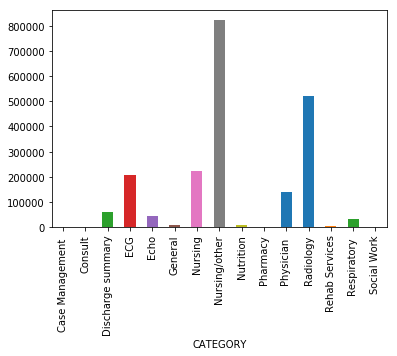

In [10]:
tmp_df.plot(kind="bar")

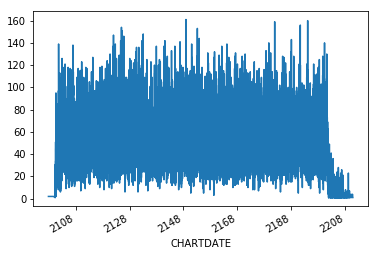

In [11]:
df.groupby('CHARTDATE')['TEXT'].count().plot()

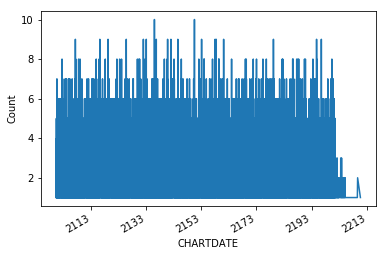

In [34]:
tmp_df = df.loc[df['CATEGORY'] == "Discharge summary"]
ax = tmp_df.groupby('CHARTDATE')['TEXT'].count().plot()
ax.set_ylabel("Count")
plt.show()

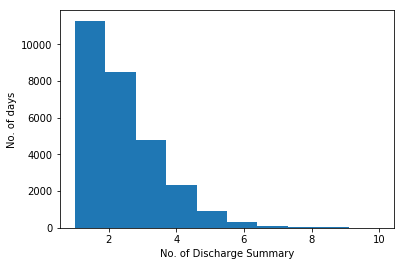

In [48]:
ax = tmp_df.groupby('CHARTDATE')['TEXT'].count().plot(kind="hist", rot=0)
ax.set_xlabel("No. of Discharge Summary")
ax.set_ylabel("No. of days")
plt.show()

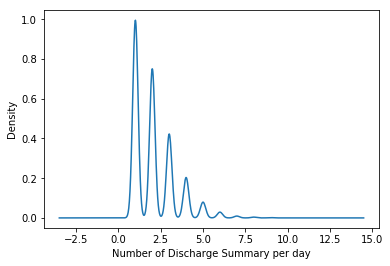

In [49]:
ax = tmp_df.groupby('CHARTDATE')['TEXT'].count().plot(kind="kde")
ax.set_xlabel("Number of Discharge Summary per day")
plt.show()

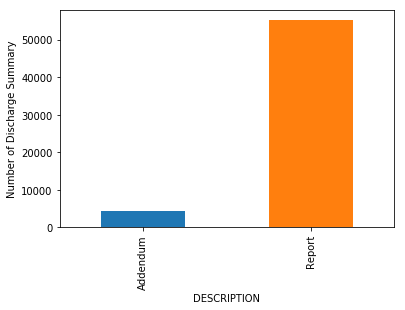

In [53]:
ax = tmp_df.groupby('DESCRIPTION')['TEXT'].count().plot(kind = "bar")
ax.set_ylabel("Number of Discharge Summary")
plt.show()

In [57]:
tmp_df.count()

ROW_ID         59652
SUBJECT_ID     59652
HADM_ID        59652
CHARTDATE      59652
CHARTTIME          0
STORETIME          0
CATEGORY       59652
DESCRIPTION    59652
CGID               0
ISERROR            0
TEXT           59652
dtype: int64

## Size includes NAN values count does not

In [17]:
print("Null=",df['STORETIME'].isnull().sum()," out of total ",df['STORETIME'].size)

Null= 836776  out of total  2083180


In [18]:
for col in df.columns:
    print("%10s \t has \t NUll = %10d out of total \t %d "%(col, df[col].size - df[col].count(),df[col].size))
    #print(col," Null =",df[col].size - df[col].count()," out of total ",df[col].size)

    ROW_ID 	 has 	 NUll =          0 out of total 	 2083180 
SUBJECT_ID 	 has 	 NUll =          0 out of total 	 2083180 
   HADM_ID 	 has 	 NUll =     231836 out of total 	 2083180 
 CHARTDATE 	 has 	 NUll =          0 out of total 	 2083180 
 CHARTTIME 	 has 	 NUll =     316566 out of total 	 2083180 
 STORETIME 	 has 	 NUll =     836776 out of total 	 2083180 
  CATEGORY 	 has 	 NUll =          0 out of total 	 2083180 
DESCRIPTION 	 has 	 NUll =          0 out of total 	 2083180 
      CGID 	 has 	 NUll =     836776 out of total 	 2083180 
   ISERROR 	 has 	 NUll =    2082294 out of total 	 2083180 
      TEXT 	 has 	 NUll =          0 out of total 	 2083180 


In [10]:
df_text = df[['CHARTDATE','CATEGORY','DESCRIPTION','TEXT']]

In [ ]:
idx = 1
print(df_text.CATEGORY[idx])
print(df_text.DESCRIPTION[idx])
print(df_text.TEXT[idx])

In [ ]:
txt

In [ ]:
txt = df_text.TEXT[idx]
print(txt)

## Regex Processing

In [ ]:
#re.sub('[^A-Za-z0-9 ]+', '', txt)
txt1 = re.sub('[\n]'," ",txt)
txt1 = re.sub('[^A-Za-z ]+', '', txt1)

In [ ]:
_wrds = txt1.split()

In [ ]:
print(len(_wrds))
print(_wrds)

## Stemming

In [ ]:
# http://www.nltk.org/howto/stem.html
print(" ".join(SnowballStemmer.languages))

In [ ]:
stemmer = SnowballStemmer("english") ## May use porter stemmer

In [ ]:
print(stemmer.stem("running"))

In [ ]:
wrds = [stemmer.stem(wrd) for wrd in _wrds]

In [ ]:
print(len(wrds))
print(wrds)

## Building Vocabulary

In [14]:
def process(txt):
    txt1 = re.sub('[\n]'," ",txt)
    txt1 = re.sub('[^A-Za-z ]+', '', txt1)
    
    _wrds = txt1.split()
    stemmer = SnowballStemmer("english") ## May use porter stemmer
    wrds = [stemmer.stem(wrd) for wrd in _wrds]
    return wrds

In [12]:
df_text.TEXT.size

50

In [81]:
data_set = []
vocabulary = []
_vocab = defaultdict(int)
for i in range(0,df_text.TEXT.size):
    txt = process(df_text.TEXT[i])
    data_set.append(txt)
    
    for wrd in txt:
        _vocab[wrd] += 1
        
    vocabulary = vocabulary + txt
    vocabulary = list(set(vocabulary))
    
    if(i%100 == 0):
        print("%5d records processed"%(i))

    0 records processed


In [83]:
print(len(_vocab))

5069


In [84]:
_vocab = sorted(_vocab.items(), key=operator.itemgetter(1), reverse=True)

In [85]:
vocab = _vocab[:100]

In [86]:
vocab[0][0]

'the'

In [36]:
vocab_map = {}
for i in range(0,len(vocab)):
    vocab_map[vocab[i][0]] = i 

In [87]:
vocabulary_map = {}
for i in range(0,len(vocabulary)):
    vocabulary_map[vocabulary[i]] = i

## Using Ngram model

In [ ]:
a = "hello my mutenot my only mutenot".split()

In [ ]:
'mutenot' in a

In [ ]:
a.index('mutenot',6)

In [ ]:
a = {}
1 in a.keys()

In [88]:
_train = {}
count = 0
for feat in data_set:
    _feat = [0]*len(vocab)
    for i in range(2,len(feat)-2):
        
        key = vocabulary_map[feat[i]]
        if key in _train.keys():
            _feat = _train[key]
        else:
            _feat = [0]*len(vocab)
        
        try:
            _feat[vocab_map[feat[i-2]]] += 1
        except:
            pass
        try:
            _feat[vocab_map[feat[i-1]]] += 1
        except:
            pass
        try:
            _feat[vocab_map[feat[i+1]]] += 1
        except:
            pass
        try:
            _feat[vocab_map[feat[i+2]]] += 1
        except:
            pass
        
        _train[key] = _feat
    if count%100 == 0:
        print("%5d records processes"%(count))
    count += 1

    0 records processes


In [91]:
print(vocab[0])
print(_train[100])

('the', 1757)
[3, 11, 5, 6, 1, 1, 2, 1, 2, 0, 4, 0, 0, 0, 10, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 1, 0, 1, 1, 0, 0, 0, 4, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 4, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1]


In [90]:
len(_train)

5068

In [92]:
X_train = []
for k in _train.keys():
    X_train.append(_train[k])

## Training the model

In [93]:
def knn_distance(w1,w2):
    res = np.dot(w1,w2)/(np.linalg.norm(w1)*np.linalg.norm(w2))
    return 1-res

In [94]:
from sklearn.neighbors import NearestNeighbors
clf = NearestNeighbors(n_neighbors=6, algorithm='ball_tree', metric=knn_distance).fit(X_train)

C:\Users\harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [95]:
key_words = list(vocab_map.keys())[-10:]

for wrd in key_words:
    dist, idxs = clf.kneighbors([X_train[vocab_map[wrd]]])
    temp = []
    for i in idxs[0]:
        temp.append(_vocab[i][0])
    print("Words Similar to ",wrd," are as follows:",temp[1:])

C:\Users\harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


Words Similar to  show  are as follows: ['intranas', 'vers', 'black', 'supraclavicular', 'fluoroscop']
Words Similar to  exam  are as follows: ['k', 'pulmonari', 'heart', 'direct', 'campus']
Words Similar to  due  are as follows: ['identifi', 'slight', 'bronch', 'isosorbid', 'pancrea']
Words Similar to  md  are as follows: ['corsetbelt', 'better', 'cx', 'cultur', 'began']
Words Similar to  increas  are as follows: ['appear', 'md', 'better', 'cultur', 'began']
Words Similar to  servic  are as follows: ['hep', 'suction', 'bls', 'alfa', 'tobramycin']
Words Similar to  bilater  are as follows: ['build', 'doe', 'seen', 'hgb', 'howev']
Words Similar to  week  are as follows: ['squeez', 'each', 'pe', 'temperatur', 'vision']
Words Similar to  prior  are as follows: ['again', 'abdomin', 'stand', 'feed', 'glass']
Words Similar to  iv  are as follows: ['trazadon', 'leaflet', 'crohn', 'qid', 'see']


In [96]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(X_train)

In [97]:
cluster_buckets = defaultdict(list)
for i in range(0,kmeans.labels_.shape[0]):
    cluster_buckets[kmeans.labels_[i]].append(i)

In [73]:
from nltk.cluster.kmeans import KMeansClusterer
kclusterer = KMeansClusterer(2, distance=knn_distance, repeats=1, avoid_empty_clusters=True)
assigned_clusters = kclusterer.cluster(np.array(X_train), assign_clusters=True)

In [74]:
cluster_buckets = defaultdict(list)
for i in range(0,len(assigned_clusters)):
    cluster_buckets[assigned_clusters[i]].append(i)

### Printing the cluster words

In [98]:
cluster_buckets_word = defaultdict(list)
for val in cluster_buckets:
    for idx in cluster_buckets[val]:
        cluster_buckets_word[val].append(_vocab[idx][0])

In [ ]:
cluster_buckets_word

## Other Techniques : Using Spark

In [101]:
import findspark
findspark.init()